In [61]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [63]:
def line_from_vector(vector, x):
    """
    AIM: Creates a list values from an entered vector. Used to plot 
         eigenvectors.
    ARGUMENTS: An vector and a list of x values
    ACTION: Calculates the slope of the line from the origin through the vector
            and generates a list of y values based on the slope and the list of x values.
    RETURN: A list of y values that can be used plot the line through a vector.
    
    """
    slope = vector[1] / vector[0]
    vector_line = []
    for point in x:
        vector_line.append(point * slope)
        
    return np.asarray(vector_line)
    

### Test Data

Test Data is generated in the cell below. I printed out and plotted this data to use as a reference during the task.


In [ ]:
a_x = 0.05
a_y= 10

In [64]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

print("Original Data")
print(data)

Original Data
[[ 0.          2.80152052]
 [ 1.00858888  4.8228341 ]
 [ 1.9549756   7.31531481]
 [ 2.98495317  9.88255214]
 [ 4.02733751 16.89106503]
 [ 5.12043222 20.44282434]
 [ 6.02413809 22.84802352]
 [ 7.1668623  31.77183081]
 [ 8.15920599 29.84123263]
 [ 8.99983604 40.04059624]
 [10.21682247 35.20174849]
 [10.78017282 42.42181379]
 [12.12414518 43.98568972]
 [12.86403274 54.30121953]
 [13.93931846 51.41896686]
 [15.23992161 57.5348794 ]
 [16.38647843 67.47317171]
 [16.70512401 64.83289488]
 [18.23678258 68.21105857]
 [18.87640091 75.06446552]]


Text(0.5, 1.0, 'Original Data')

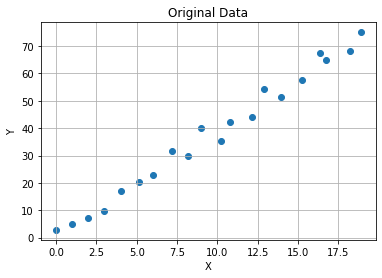

In [65]:
# x, y = map(list, zip(*data))
x, y = data.T
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Original Data")

### PCA USing NumPy

**Standardise**<br>
The first step in a PCA is to standardise the data by subtracting the mean from each data point. Once this is complete, if we plot the data, we see that the data points are still in the same shape but on a much smaller scale. This is an essential step as if there is a significant difference between ranges in the initial variables, the variables with the more extensive ranges will dominate over the ones with smaller ranges, and the results will be biased. Standardising the data also moves the plot to be centred around the origin. <br>
**Covariance Matrix**<br>
Then the covariance matrix was calculated. The covariance matrix would be a two-by-two matrix for a data set with two dimensions. The covariance matrix is used to identify how elements in the data set correlate and help identify redundant information.<br>
**Eigenvalues and Eigenvectors**<br>
Eigenvalues and Eigenvectors are calculated from the covariance matrix. These are used to identify the principal components of the data. These components are uncorrelated, and most information is compressed into the first component. Most of the remaining information is put into the second component until all the information is accounted for; in this example, there are two components. Components with low amounts of information can be discarded with minimum loss to the data. Eigenvalues and Eigenvectors represent the components. The amount of information contained by an Eigenvectors is defined by its Eigenvalues. If a vector's Eigenvalue is significantly low, it can be discarded without much data loss.<br>
**Projecting The Data**<br>
The standardised data is then transformed with the Eigenvectors. This changes the information, so the axis represented by the Eigenvectors is now the x and y-axis, and the data is described in relation to the Eigenvectors.
**Reverse transform**<br>
To revert the data to the standardised form, the data is transformed with the transpose of the Eigenvectors or the inverse of the Eigenvectors. Then to turn the data back to the original, it is multiplied by the standard deviation, and the mean is added. There is no apparent data loss for a two-dimensional data set using two components. However, if a component were dropped to reduce the data set to one dimension, there would be data loss. 




In [109]:
# The mean of each dimension of the test data was calculated.
data_mean = np.mean(data.T, axis=1)
data_std_dev = np.std(data.T, axis=1)

# The data was standardized by subtracting the mean from each data point.
standardized_data = (data - data_mean) / data_std_dev

# Calculated from the standardized data. Results in a two by two matrix.
covariance_matrix = np.cov(standardized_data.T)

# Eigenvalues and Eigenvectors calculated from the covariance matrix
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# The projected data is created by transforming the Eigenvectors with the standardized data.
projected_data = eig_vectors.dot(standardized_data.T)

# The data is converted back to the standardized data by transforming the transpose of 
# Eigenvectors with the projected data.
reverse_transform = eig_vectors.T.dot(projected_data)

# The data is converted back to its original form by adding the mean back onto each data point.
original_data = (reverse_transform.T * data_std_dev) + data_mean

In [110]:
print("Mean:")
print(data_mean, "\n\n")
print("data_std_dev:")
print(data_std_dev, "\n\n")
print("Covariance Matrix:")
print(covariance_matrix, "\n\n")
print("Eigenvalues:")
print(eig_values, "\n\n")
print("Eigenvectors:")
print(eig_vectors, "\n\n")

Mean:
[ 9.54077645 37.35518513] 


data_std_dev:
[ 5.7749163  22.27352884] 


Covariance Matrix:
[[1.05263158 1.04526242]
 [1.04526242 1.05263158]] 


Eigenvalues:
[0.00736916 2.097894  ] 


Eigenvectors:
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]] 




**Standardized Data Figure**<br>
This figure shows the data after standardisation, which is compressed but still in the same shape as the original data. The Eigenvectors have also been plotted through this chart and can be seen as almost orthogonal.

Text(0.5, 1.0, 'Standardized Data')

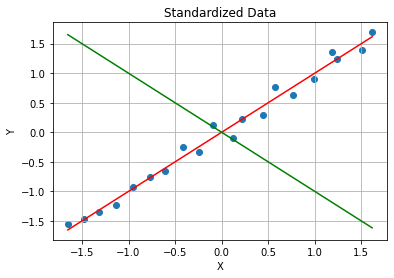

In [111]:
x, y = standardized_data.T

v1 = line_from_vector(eig_vectors[0], x)
v2 = line_from_vector(eig_vectors[1], x)

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.plot(x, v1, 'r')
ax.plot(x, v2, 'g')
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Standardized Data")

**Projected from  Eigenvectors**<br>
This figure shows the result of transforming the standardised data with the Eigenvectors. The data is compressed and centred around the axis of the two Eigenvectors

Text(0.5, 1.0, 'Projected from  Eigenvectors')

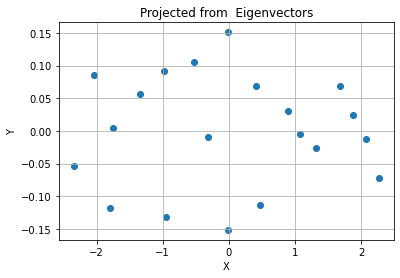

In [112]:
x, y = projected_data

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Projected from  Eigenvectors")

**Data returned to original form**<br>
This figure shows the data reverted to its original form.

Text(0.5, 1.0, 'Data returned to original form')

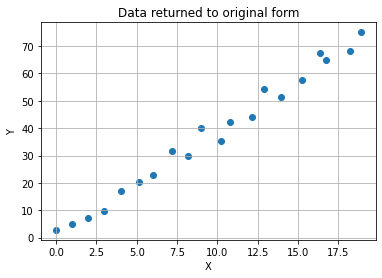

In [113]:
x, y = original_data.T

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data returned to original form")

### Print Out of Data at Each Step

In [115]:
print("Standardized data (data - mean) / std_dev:")
print(standardized_data, "\n\n")
print("Data projection after transform with Eigenvectors:")
print(projected_data.T, "\n\n")
print("Data returned to standardized form, transformed with transpose of Eigenvectors:")
print(reverse_transform.T, "\n\n")
print("Data returned to original form after standardized form (data * std_dev) + mean:")
print(original_data)

Standardized data (data - mean) / std_dev:
[[-1.65210645 -1.55133319]
 [-1.47745649 -1.4605836 ]
 [-1.31357763 -1.34868033]
 [-1.13522395 -1.23342077]
 [-0.95472188 -0.91876416]
 [-0.76543867 -0.75930316]
 [-0.60895053 -0.65131851]
 [-0.41107334 -0.25067219]
 [-0.23923645 -0.33734899]
 [-0.09367069  0.12056514]
 [ 0.11706594 -0.09668143]
 [ 0.2146172   0.2274731 ]
 [ 0.44734306  0.29768541]
 [ 0.57546397  0.76081498]
 [ 0.76166334  0.63141237]
 [ 0.98687927  0.90599448]
 [ 1.18542012  1.35218747]
 [ 1.24059764  1.23364869]
 [ 1.50582375  1.38531589]
 [ 1.61658178  1.6930088 ]] 


Data projection after transform with Eigenvectors:
[[ 2.26517389 -0.07125745]
 [ 2.07750807 -0.01193093]
 [ 1.88250066  0.02482136]
 [ 1.67488474  0.06943564]
 [ 1.32475468 -0.02542594]
 [ 1.07815528 -0.00433846]
 [ 0.89114479  0.02995868]
 [ 0.46792476 -0.11342074]
 [ 0.40770747  0.06937605]
 [-0.01901725 -0.15148761]
 [-0.01441403  0.15114222]
 [-0.31260505 -0.00909049]
 [-0.52681468  0.10582394]
 [-0.944891

### PCA with scikit-learn

The same process was carried out with scikit-learn. In this case, a PCA class can be used to do the work for us. When the PCA class is initialised, the number of components required can be specified. For the first case, I chose two. The fit method is used to standardise the data, and Eigenvectors and Eigenvalues can be accessed using the 'components_' and 'explained_variance_' properties. The data is transformed using the transform method, which can be reverted to its original form using the inverse_transform method.

In [119]:
# PCA class initialised with 2 components selected.
pca_two_components = PCA(n_components=2)

# Fit method called to standardise the data.
pca_two_components.fit(data)

# I wasn't able to access the standardised data from the fit class so calculated it by subtracting
# the mean from the data. Sikit learn does not seem to divide by the standard deviation when standardising its data.
standardized_data_sikit = (data - pca_two_components.mean_)

# Eigenvectors and Eigenvalues accessed from class attributes.
eig_vectors_sikit = pca_two_components.components_
eig_values_sikit = pca_two_components.explained_variance_

# Data is transformed.
x_transformed_two_components = pca_two_components.transform(data)

# Data is reverted to original form.
x_inverse_transformed_two_components = pca_two_components.inverse_transform(x_transformed_two_components)

In [120]:
print("Eigenvectors:")
print(eig_vectors_sikit, "\n\n")
print("Eigenvalues:")
print(eig_values_sikit)

Eigenvectors:
[[ 0.2495327   0.96836637]
 [-0.96836637  0.2495327 ]] 


Eigenvalues:
[5.56866723e+02 4.59324716e-01]


**Standardized Data Figure**<br>
I think sikit learn does not divide by the mean, as this graph is the same as the results I got for PCA with NumPy before I started dividing by the standard deviation. If I standardise the data by dividing by the standard deviation, the data does not match up with the Eigenvectors.

Text(0.5, 1.0, 'Standardized Data')

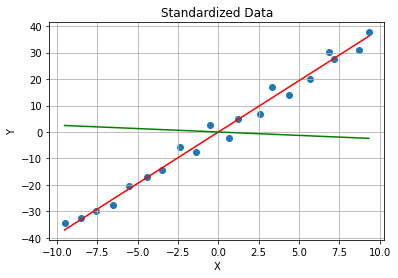

In [121]:
x, y = standardized_data_sikit.T

v1 = line_from_vector(eig_vectors_sikit[0], x)
v2 = line_from_vector(eig_vectors_sikit[1], x)

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.plot(x, v1, 'r')
ax.plot(x, v2, 'g')
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Standardized Data")

**Projected from  Eigenvectors**<br>
This figure shows the result of transforming the standardised data with the Eigenvectors. The data is compressed and centred around the axis of the two Eigenvectors

Text(0.5, 1.0, 'Data after Transform')

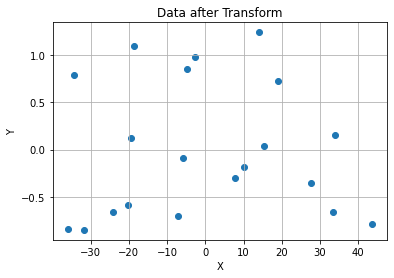

In [58]:
x, y = x_transformed_two_components.T
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data after Transform")

**Data returned to original form**<br>
This figure shows the data reverted to its original form.

Text(0.5, 1.0, 'Data returned to original Form')

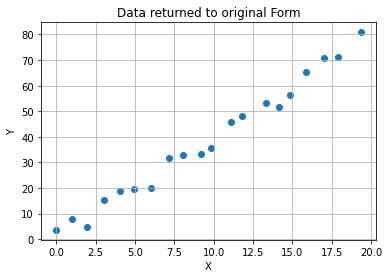

In [59]:
# x, y = map(list, zip(*data))
x, y = x_inverse_transformed_two_components.T
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data returned to original Form")

### Print Out of Data at Each Step

In [60]:
print(standardized_data_sikit)
print("\n\n")
print(x_transformed_two_components)
print("\n\n")
print(x_inverse_transformed_two_components)

[[ -9.52966988 -34.71893743]
 [ -8.5185925  -30.62118003]
 [ -7.56919968 -33.5972218 ]
 [ -6.46912523 -23.20807545]
 [ -5.44618955 -19.41203243]
 [ -4.56464959 -18.81324525]
 [ -3.48044061 -18.46918323]
 [ -2.39304038  -6.70417798]
 [ -1.4966896   -5.62943274]
 [ -0.35539769  -4.93025396]
 [  0.32230379  -2.77067744]
 [  1.58910109   7.61751858]
 [  2.28947704   9.93842623]
 [  3.77074873  14.94336609]
 [  4.58579782  13.24256058]
 [  5.28886949  18.1791736 ]
 [  6.33906478  26.87813821]
 [  7.46253663  32.63603648]
 [  8.38307543  32.93663184]
 [  9.79201991  42.50256617]]



[[-3.59932403e+01 -8.40164272e-01]
 [-3.17726042e+01 -8.51297343e-01]
 [-3.44302393e+01  7.90393014e-01]
 [-2.40838508e+01 -6.57630360e-01]
 [-2.01530813e+01 -5.84208377e-01]
 [-1.93586754e+01  1.26128287e-01]
 [-1.87623469e+01  1.09477684e+00]
 [-7.08410328e+00 -6.98659702e-01]
 [-5.82431438e+00 -8.91894610e-02]
 [-4.86961401e+00  8.48864577e-01]
 [-2.61020846e+00  9.83536966e-01]
 [ 7.77562403e+00 -3.02493874e-

### PCA with scikit-learn with one component.
The process was carried out again with one component. This time we can see that there is a data loss when the data is transformed back to its original form. 


In [122]:
# PCA class initialised with 1 component selected.
pca_one_component = PCA(n_components=1)

# Fit method called to standardise the data.
pca_one_component.fit(data)

print("Eigenvector:")
print(pca_one_component.components_, "\n\n")
print("Eigenvalue:")
print(pca_one_component.explained_variance_)

# Data is transformed.
x_transformed_one_component = pca_one_component.transform(data)

# Data is reverted to original form.
x_inverse_transformed_one_component = pca_one_component.inverse_transform(x_transformed_one_component)

Eigenvector:
[[0.2495327  0.96836637]] 


Eigenvalue:
[556.86672294]


In [123]:
print(x_transformed_one_component)
print("\n\n")
print(x_inverse_transformed_one_component)

[[-35.84134257]
 [-33.63229456]
 [-30.98250562]
 [-28.23946624]
 [-21.19254905]
 [-17.4803819 ]
 [-14.92576373]
 [ -5.99910177]
 [ -7.62100594]
 [  2.4654795 ]
 [ -1.91662004]
 [  5.21562273]
 [  7.06539265]
 [ 17.23923098]
 [ 14.71647336]
 [ 20.96346042]
 [ 30.87347192]
 [ 28.39622911]
 [ 32.04972812]
 [ 38.84594264]]



[[ 0.59718954  2.64763422]
 [ 1.14841925  4.78680203]
 [ 1.80962823  7.35276853]
 [ 2.49410625 10.00903563]
 [ 4.25254251 16.83303327]
 [ 5.17884959 20.42777111]
 [ 5.81631036 22.90157744]
 [ 8.0438044  31.54585671]
 [ 7.63908628 29.97525926]
 [10.1559942  39.74267257]
 [ 9.06251708 35.49919473]
 [10.84224486 42.4058188 ]
 [11.30382294 44.19707379]
 [13.84252827 54.04907671]
 [13.21301776 51.60612307]
 [14.77184529 57.65549527]
 [17.2447172  67.25201716]
 [16.62656412 64.85313853]
 [17.53823158 68.39106412]
 [19.23410933 74.97228972]]


**Comparison Between Original Data and Data After Transform**<br>
In the figure below, we see the original data in blue and the data after it has been reverted to its original form is in red. Because a component was dropped, there was data loss.

Text(0.5, 1.0, 'Comparison of data from one and two components')

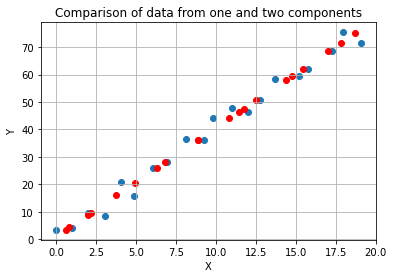

In [28]:
# x, y = map(list, zip(*data))
x, y = x_inverse_transformed_two_components.T
i, j = x_inverse_transformed_one_component.T
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.scatter(x=i, y=j, color='r')
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Comparison of data from one and two components")